In [1]:
#import pandas as pd
#data = pd.read_csv('airlines.csv')

import os
import pandas as pd
os.getcwd()
os.chdir(r'C:\Users\Jordi\OneDrive\Documents\GitHub\JordiGiorgio')


In [114]:
df = pd.read_csv('airlines.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [116]:
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [118]:
df['Customer Type'].describe()

count             129487
unique                 2
top       Loyal Customer
freq              105773
Name: Customer Type, dtype: object

In [119]:
df['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [120]:
df.Gender.value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

In [121]:
df.keys()

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [122]:
df.satisfaction = df.satisfaction.map({
                               'dissatisfied':0,
                               'satisfied':1
                               })

In [123]:
df.satisfaction.value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

In [124]:
df.Gender = df.Gender.map({
                           'Female':0,
                           'Male':1
                          })

In [125]:
df.Gender.value_counts()

0    65703
1    63784
Name: Gender, dtype: int64

In [126]:
df['Customer Type'] = df['Customer Type'].map({
                          'disloyal Customer':0,
                          'Loyal Customer':1
                         })

In [127]:
df.Class = df.Class.map({
                                                   'Eco':0,
                                                   'Business':1,
                                                   'Eco Plus':2
                                                  })

In [128]:
df['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

In [129]:
df['Type of Travel'] = df['Type of Travel'].map({
                                                 'Personal Travel':0,
                                                 'Business travel':1
                                                  })

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Gender                             129487 non-null  int64  
 2   Customer Type                      129487 non-null  int64  
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int64  
 5   Class                              129487 non-null  int64  
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

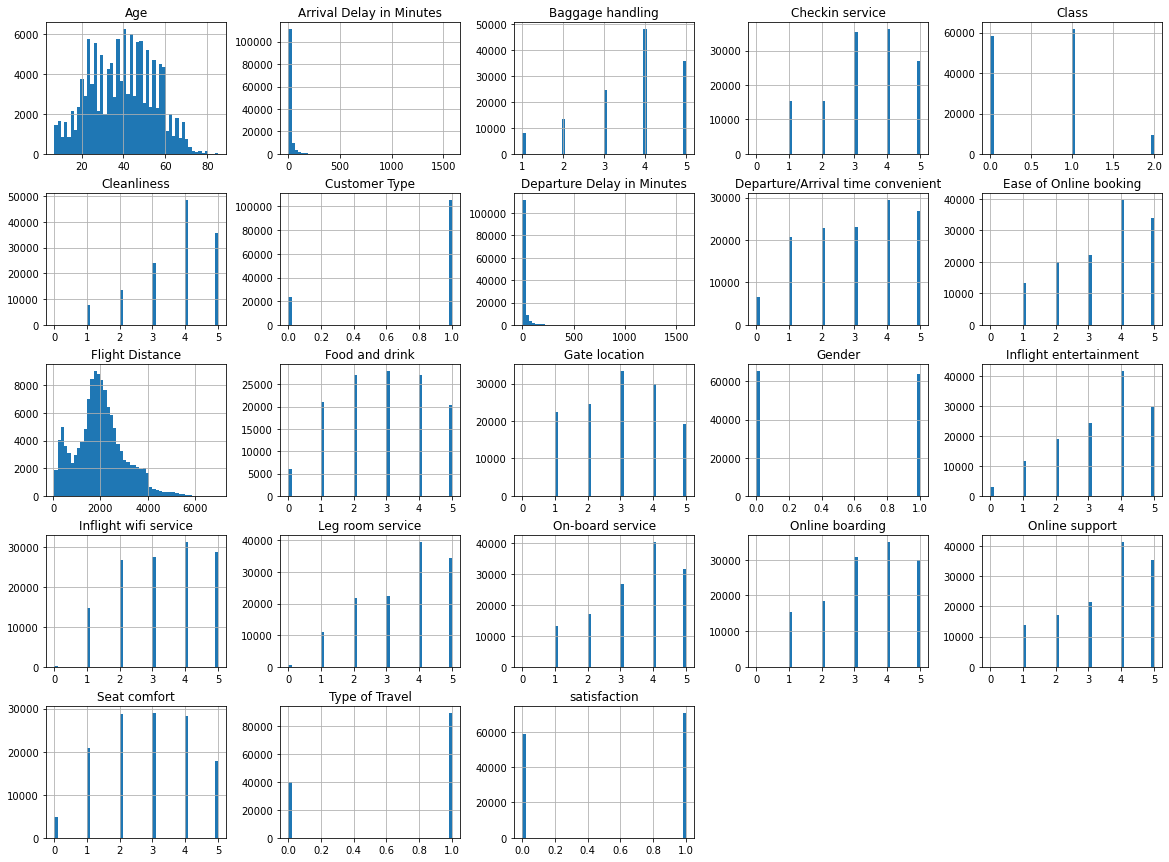

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

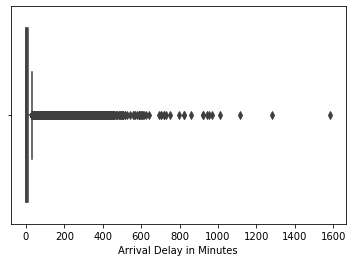

In [133]:
import seaborn as sn
sn.boxplot(df['Arrival Delay in Minutes'])

In [134]:
#Checking
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(((dfsc<(Q1-1.5*IQR))|(dfsc>(Q3+1.5*IQR))).sum())

satisfaction                              0
Gender                                    0
Customer Type                        129487
Age                                       0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Seat comfort                          25663
Departure/Arrival time convenient     27415
Food and drink                        26930
Gate location                         22499
Inflight wifi service                 14800
Inflight entertainment                33854
Online support                        52630
Ease of Online booking                   18
On-board service                     129487
Leg room service                        442
Baggage handling                      45757
Checkin service                      129487
Cleanliness                           45019
Online boarding                       33841
Departure Delay in Minutes                2
Arrival Delay in Minutes        

In [135]:
#Looking for outliers from 'Customer Type'
Q1 = df['Customer Type'].quantile(0.25)
Q3 = df['Customer Type'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of Customer Type = ',Q1)
print('Q3 of Customer Type = ',Q3)
print('IQR of Customer Type = ',IQR)
Lower_Whisker_Customer_Type = Q1 - 1.5 * IQR
Upper_Whisker_Customer_Type = Q3 + 1.5 * IQR
print('Lower_Whisker_Customer Type = ', Lower_Whisker_Customer_Type)
print('Upper_Whisker_Customer Type = ',Upper_Whisker_Customer_Type)


Q1 of Customer Type =  1.0
Q3 of Customer Type =  1.0
IQR of Customer Type =  0.0
Lower_Whisker_Customer Type =  1.0
Upper_Whisker_Customer Type =  1.0


In [136]:
#Removing any outliers from 'Customer Type'
df2 = df[(df['Customer Type']<(Q3+1.5*IQR)) & (df['Customer Type']<(Q3+1.5*IQR))]
#df_sc = df_sc[df_sc['Customer Type']<(Q3+1.5*IQR)]
#df_sc = df_sc[df_sc['Customer Type']>(Q1-1.5*IQR)]

In [137]:
#Looking for outliers from 'Flight Distance'
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of Flight Distance = ',Q1)
print('Q3 of Flight Distance = ',Q3)
print('IQR of Flight Distance = ',IQR)
Lower_Whisker_Flight_Distance = Q1 - 1.5 * IQR
Upper_Whisker_Flight_Distance = Q3 + 1.5 * IQR
print('Lower_Whisker_Flight Distance = ', Lower_Whisker_Flight_Distance)
print('Upper_Whisker_Flight Distance = ',Upper_Whisker_Flight_Distance)


Q1 of Flight Distance =  1359.0
Q3 of Flight Distance =  2543.0
IQR of Flight Distance =  1184.0
Lower_Whisker_Flight Distance =  -417.0
Upper_Whisker_Flight Distance =  4319.0


In [138]:
#Removing any outliers from 'Flight Distance'
df2 = df[(df['Flight Distance']<(Q3+1.5*IQR)) & (df['Flight Distance']<(Q3+1.5*IQR))]


In [139]:
#Looking for outliers from 'On-board service'
Q1 = df['On-board service'].quantile(0.25)
Q3 = df['On-board service'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of On-board service = ',Q1)
print('Q3 of On-board service = ',Q3)
print('IQR of On-board service = ',IQR)
Lower_Whisker_On_board_service = Q1 - 1.5 * IQR
Upper_Whisker_On_board_service = Q3 + 1.5 * IQR
print('Lower_Whisker_On-board service = ', Lower_Whisker_On_board_service)
print('Upper_Whisker_On-board service = ',Upper_Whisker_On_board_service)


Q1 of On-board service =  3.0
Q3 of On-board service =  4.0
IQR of On-board service =  1.0
Lower_Whisker_On-board service =  1.5
Upper_Whisker_On-board service =  5.5


In [140]:
#Removing any outliers from 'On-board service'
df2 = df[(df['On-board service']<(Q3+1.5*IQR)) & (df['On-board service']<(Q3+1.5*IQR))]


In [141]:
#Looking for outliers from 'Checkin service'
Q1 = df['Checkin service'].quantile(0.25)
Q3 = df['Checkin service'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of Checkin service = ',Q1)
print('Q3 of Checkin service = ',Q3)
print('IQR of Checkin service = ',IQR)
Lower_Whisker_Checkin_service = Q1 - 1.5 * IQR
Upper_Whisker_Checkin_service = Q3 + 1.5 * IQR
print('Lower_Whisker_Checkin service = ', Lower_Whisker_Checkin_service)
print('Upper_Whisker_Checkin service = ',Upper_Whisker_Checkin_service)


Q1 of Checkin service =  3.0
Q3 of Checkin service =  4.0
IQR of Checkin service =  1.0
Lower_Whisker_Checkin service =  1.5
Upper_Whisker_Checkin service =  5.5


In [142]:
#Removing any outliers from 'Checkin service'
df2 = df[(df['Checkin service']<(Q3+1.5*IQR)) & (df['Checkin service']<(Q3+1.5*IQR))]


In [143]:
#Looking for outliers from 'Departure Delay in Minutes'
Q1 = df['Departure Delay in Minutes'].quantile(0.25)
Q3 = df['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of Departure Delay in Minutes = ',Q1)
print('Q3 of Departure Delay in Minutes = ',Q3)
print('IQR of Departure Delay in Minutes = ',IQR)
Lower_Whisker_Departure_Delay_in_Minutes = Q1 - 1.5 * IQR
Upper_Whisker_Departure_Delay_in_Minutes = Q3 + 1.5 * IQR
print('Lower_Whisker_Departure Delay in Minutes = ', Lower_Whisker_Departure_Delay_in_Minutes)
print('Upper_Whisker_Departure Delay in Minutes = ',Upper_Whisker_Departure_Delay_in_Minutes)


Q1 of Departure Delay in Minutes =  0.0
Q3 of Departure Delay in Minutes =  12.0
IQR of Departure Delay in Minutes =  12.0
Lower_Whisker_Departure Delay in Minutes =  -18.0
Upper_Whisker_Departure Delay in Minutes =  30.0


In [144]:
#Removing any outliers from 'Departure Delay in Minutes'
df2 = df[(df['Departure Delay in Minutes']<(Q3+1.5*IQR)) & (df['Departure Delay in Minutes']<(Q3+1.5*IQR))]


In [145]:
#Looking for outliers from 'Arrival Delay in Minutes'
Q1 = df['Arrival Delay in Minutes'].quantile(0.25)
Q3 = df['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3-Q1
print('Q1 of Arrival Delay in Minutes = ',Q1)
print('Q3 of Arrival Delay in Minutes = ',Q3)
print('IQR of Arrival Delay in Minutes = ',IQR)
Lower_Whisker_Arrival_Delay_in_Minutes = Q1 - 1.5 * IQR
Upper_Whisker_Arrival_Delay_in_Minutes = Q3 + 1.5 * IQR
print('Lower_Whisker_Arrival Delay in Minutes = ', Lower_Whisker_Arrival_Delay_in_Minutes)
print('Upper_Whisker_Arrival Delay in Minutes = ',Upper_Whisker_Arrival_Delay_in_Minutes)


Q1 of Arrival Delay in Minutes =  0.0
Q3 of Arrival Delay in Minutes =  13.0
IQR of Arrival Delay in Minutes =  13.0
Lower_Whisker_Arrival Delay in Minutes =  -19.5
Upper_Whisker_Arrival Delay in Minutes =  32.5


In [146]:
#Removing any outliers from 'Arrival Delay in Minutes'
df2 = df[(df['Arrival Delay in Minutes']<(Q3+1.5*IQR)) & (df['Arrival Delay in Minutes']<(Q3+1.5*IQR))]


In [147]:
df2.shape

(111995, 23)

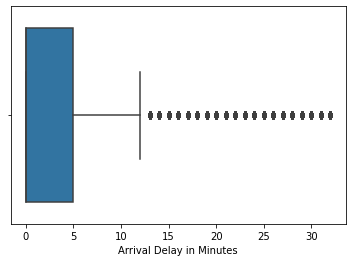

In [148]:
sn.boxplot(df2['Arrival Delay in Minutes'])

In [149]:
from sklearn.cluster import KMeans
import numpy as np
#X = np.array(df_sc)
X = df2

In [150]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                precompute_distances='deprecated', random_state=None, copy_x=True, algorithm='auto')

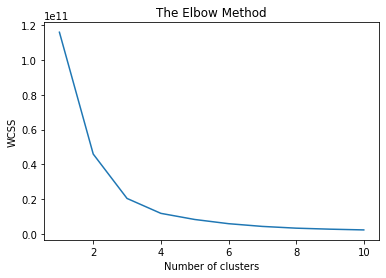

In [151]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal k = 3

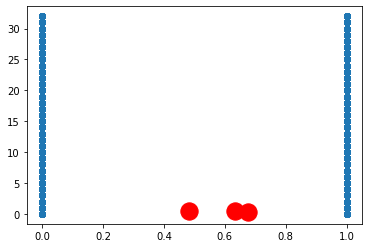

In [152]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['satisfaction'], X['Arrival Delay in Minutes'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Based on the above visualization Kmeans clustering is not a goood model for this dataset

The following is the Modelling with a MultiLinear Regression

In [153]:
X = df2.drop(['satisfaction'],axis=1)
y = df2.satisfaction

In [154]:
y.value_counts()

1    62824
0    49171
Name: satisfaction, dtype: int64

In [155]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,65,0,0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
2,0,1,15,0,0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,60,0,0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,70,0,0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1,1,30,0,0,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129869,0,0,55,0,0,1953,5,2,5,4,...,5,1,1,1,3,3,4,1,0,0.0
129871,0,0,35,0,0,3287,5,4,5,3,...,2,2,4,5,4,4,3,2,9,0.0
129872,0,0,69,0,0,2240,5,4,5,3,...,4,4,5,4,4,3,4,4,4,0.0
129874,0,0,11,0,0,2752,5,5,5,2,...,2,2,3,5,3,5,4,2,5,0.0


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)

The following try is with a Logistic Regression model

In [165]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
#log.fit(X_train,y_train)
#log.score(X_test,y_test)

In [166]:
from sklearn.model_selection import cross_val_score
print('Cross Validation Score using Logistic Regression = ', cross_val_score(log,X_train,y_train,cv=10).mean())

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Score using Logistic Regression =  0.7631765443452544


C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
log.fit(X_train,y_train)

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
log.score(X_train,y_train)

0.7674626256441656

In [173]:
log.score(X_test,y_test)

0.7666597220155362

The following is a try with a Knn Regression

In [168]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [169]:
print('Cross Validation Score using Knn Classifier = ', cross_val_score(knn,X_train,y_train,cv=10).mean())

Cross Validation Score using Knn Classifier =  0.710036428272036


In [176]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [177]:
knn.score(X_train,y_train)

0.8174013980305117

In [178]:
knn.score(X_test,y_test)

0.7169856245721599

The following is a try with a Random Forest Regression

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                            warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [171]:
print('Cross Validation Score using Random Forest Classifier = ', cross_val_score(rf,X_train,y_train,cv=10).mean())

Cross Validation Score using Random Forest Classifier =  0.9545256888633753


In [179]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [180]:
rf.score(X_train,y_train)

0.9999489769886218

In [181]:
rf.score(X_test,y_test)

0.9530938420786333

The following is a try with an AdaboostClassifier model

In [182]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.5, algorithm='SAMME.R', random_state=None)

In [183]:
print('Cross Validation Score using AdaBoost Classifier = ', cross_val_score(ada,X_train,y_train,cv=10).mean())

Cross Validation Score using AdaBoost Classifier =  0.8966145495703065


In [184]:
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5)

In [185]:
ada.score(X_train,y_train)

0.8964105311495485

In [186]:
ada.score(X_test,y_test)

0.8971993214083752

The following is a try with a SVC model

In [187]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
          tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovo', 
          break_ties=False, random_state=None)

In [188]:
print('Cross Validation Score unsing SVC = ', cross_val_score(svc,X_train,y_train,cv=10).mean())

Cross Validation Score unsing SVC =  0.6027987010916115


In [189]:
svc.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [190]:
svc.score(X_train,y_train)

0.6046609520893923

In [191]:
svc.score(X_test,y_test)

0.6047799041638144

Based on the above modellings, the one standing out is the AdaBoost Classifier which has the best score and the best fit.
Let's run a GridSearchCv

In [192]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,20,30,40,50], 'learning_rate':[0.1,0.2,0.3,0.4,0.5], 
          'algorithm':['SAMME','SAMME.R']}
ada = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=10)

In [193]:
ada.fit(X_train,y_train)
ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50}

In [194]:
ada.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [195]:
ada.score(X_train,y_train)

0.8964105311495485

In [196]:
ada.score(X_test,y_test)

0.8971993214083752

There is no overfit neither underfit and a good score with the AdaBoost Classifier model.